Progetto BUSINESS INTELLIGENCE PER I SERVIZI FINANZIARI 
Appello 19/07/2024 

Riccardo Savio 885955

Stocks scelte:

- Info Tech
    - NVDA
    - QCOM

- Healthcare
    - UNH
    - JNJ

- Utilities 
    - NEE
    - SO


### Preparazione Ambiente

Installazione dei moduli richiesti:

pip install numpy
pip install pandas
pip install matplotlib
pip install yfinance


In [15]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

Scelgo l'intervallo di date per le azioni scelte

In [16]:
start = datetime.datetime(2014, 5, 31)
end = datetime.datetime(2024, 5, 31)

Utilizzando la funzione "download" della libreria yfinance, scarico i dati per ciascuna stock nell'intervallo di date scelte sopra

In [17]:
SP500 = pd.DataFrame(yf.download('^GSPC', start=start, end=end))
NVDA = pd.DataFrame(yf.download('NVDA', start=start, end=end))
QCOM = pd.DataFrame(yf.download('QCOM', start=start, end=end))
UNH = pd.DataFrame(yf.download('UNH', start=start, end=end))
LLY = pd.DataFrame(yf.download('LLY', start=start, end=end))
NEE = pd.DataFrame(yf.download('NEE', start=start, end=end))
SO = pd.DataFrame(yf.download('SO', start=start, end=end))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Salvo tutti i dataframe in file csv per renderli persistenti

In [18]:
SP500.to_csv('SP500.csv')
NVDA.to_csv('NVDA.csv')
QCOM.to_csv('QCOM.csv')
UNH.to_csv('UNH.csv')
LLY.to_csv('LLY.csv')
NEE.to_csv('NEE.csv')
SO.to_csv('SO.csv')

Visualizzo la struttura dei dataframe

In [19]:
print(SP500.columns)
print(NVDA.columns)
print(QCOM.columns)
print(UNH.columns)
print(LLY.columns)
print(NEE.columns)
print(SO.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Rimuovo tutti i valori nulli dei dataframe

In [20]:
SP500.dropna(inplace=True)
NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)

In [21]:
stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]

Visualizzo i dati delle chiusure aggiustate giornaliere

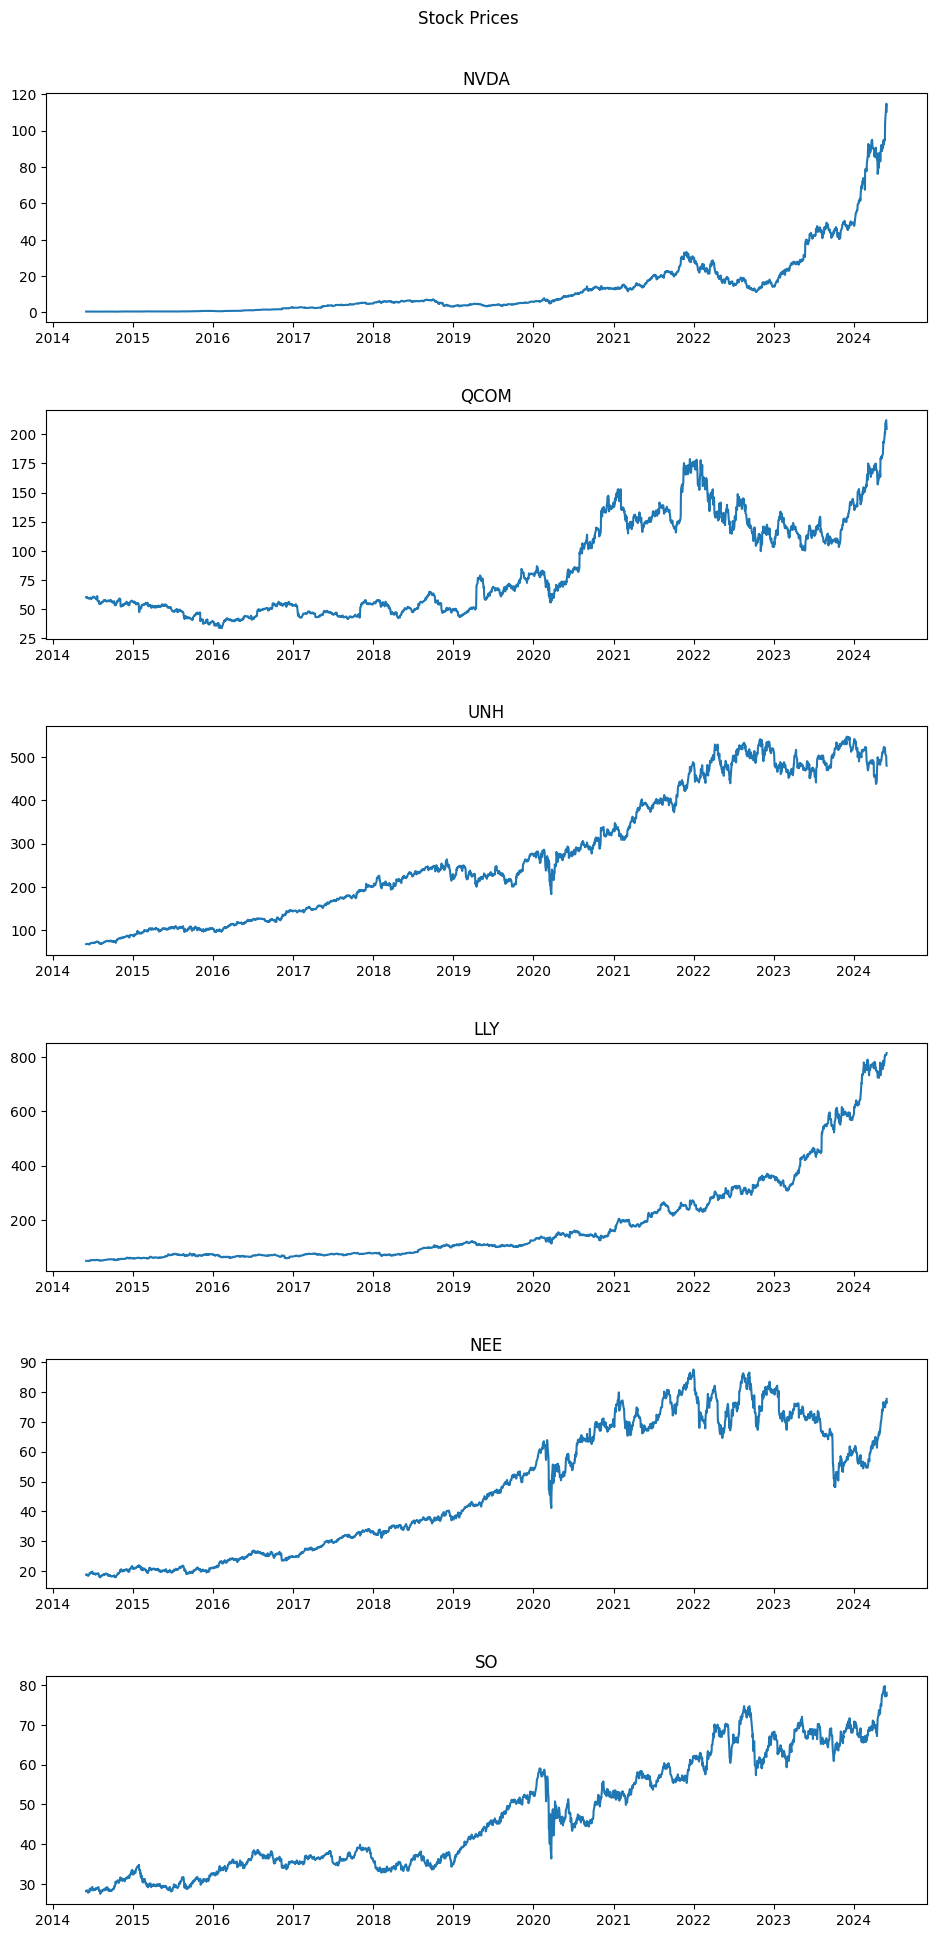

In [22]:
#create 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Stock Prices')

axs[0].plot(NVDA['Adj Close'])
axs[0].set_title('NVDA')

axs[1].plot(QCOM['Adj Close'])
axs[1].set_title('QCOM')

axs[2].plot(UNH['Adj Close'])
axs[2].set_title('UNH')

axs[3].plot(LLY['Adj Close'])
axs[3].set_title('LLY')

axs[4].plot(NEE['Adj Close'])
axs[4].set_title('NEE')

axs[5].plot(SO['Adj Close'])
axs[5].set_title('SO')

plt.tight_layout(pad=3.0)
plt.show()

Calcolo rendimenti semplici lordi, netti e logaritmici 

In [23]:
NVDA['Net Return'] = NVDA['Adj Close'].pct_change()
QCOM['Net Return'] = QCOM['Adj Close'].pct_change()
UNH['Net Return'] = UNH['Adj Close'].pct_change()
LLY['Net Return'] = LLY['Adj Close'].pct_change()
NEE['Net Return'] = NEE['Adj Close'].pct_change()
SO['Net Return'] = SO['Adj Close'].pct_change()

NVDA['Gross Return'] = NVDA['Adj Close']/NVDA['Adj Close'].shift(1)
QCOM['Gross Return'] = QCOM['Adj Close']/QCOM['Adj Close'].shift(1)
UNH['Gross Return'] = UNH['Adj Close']/UNH['Adj Close'].shift(1)
LLY['Gross Return'] = LLY['Adj Close']/LLY['Adj Close'].shift(1)
NEE['Gross Return'] = NEE['Adj Close']/NEE['Adj Close'].shift(1)
SO['Gross Return'] = SO['Adj Close']/SO['Adj Close'].shift(1)

NVDA['Log Return'] = np.log(NVDA['Gross Return'])
QCOM['Log Return'] = np.log(QCOM['Gross Return'])
UNH['Log Return'] = np.log(UNH['Gross Return'])
LLY['Log Return'] = np.log(LLY['Gross Return'])
NEE['Log Return'] = np.log(NEE['Gross Return'])
SO['Log Return'] = np.log(SO['Gross Return'])

NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)



Visualizzo i rendimenti netti, lordi e logaritmici per le singole stock

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2014-06-03  59.310001  59.630001  59.110001  59.349998  48.458038  2798200   
2014-06-04  59.180000  59.450001  58.990002  59.220001  48.351898  2997400   
2014-06-05  59.279999  59.759998  59.070000  59.580002  48.645824  2753800   
2014-06-06  59.849998  59.849998  59.380001  59.630001  48.686646  2551300   
2014-06-09  59.570000  59.759998  59.189999  59.740002  48.776466  2570100   

            Net Return  Gross Return  Log Return  
Date                                              
2014-06-03   -0.002353      0.997647   -0.002356  
2014-06-04   -0.002190      0.997810   -0.002193  
2014-06-05    0.006079      1.006079    0.006060  
2014-06-06    0.000839      1.000839    0.000839  
2014-06-09    0.001845      1.001845    0.001843  


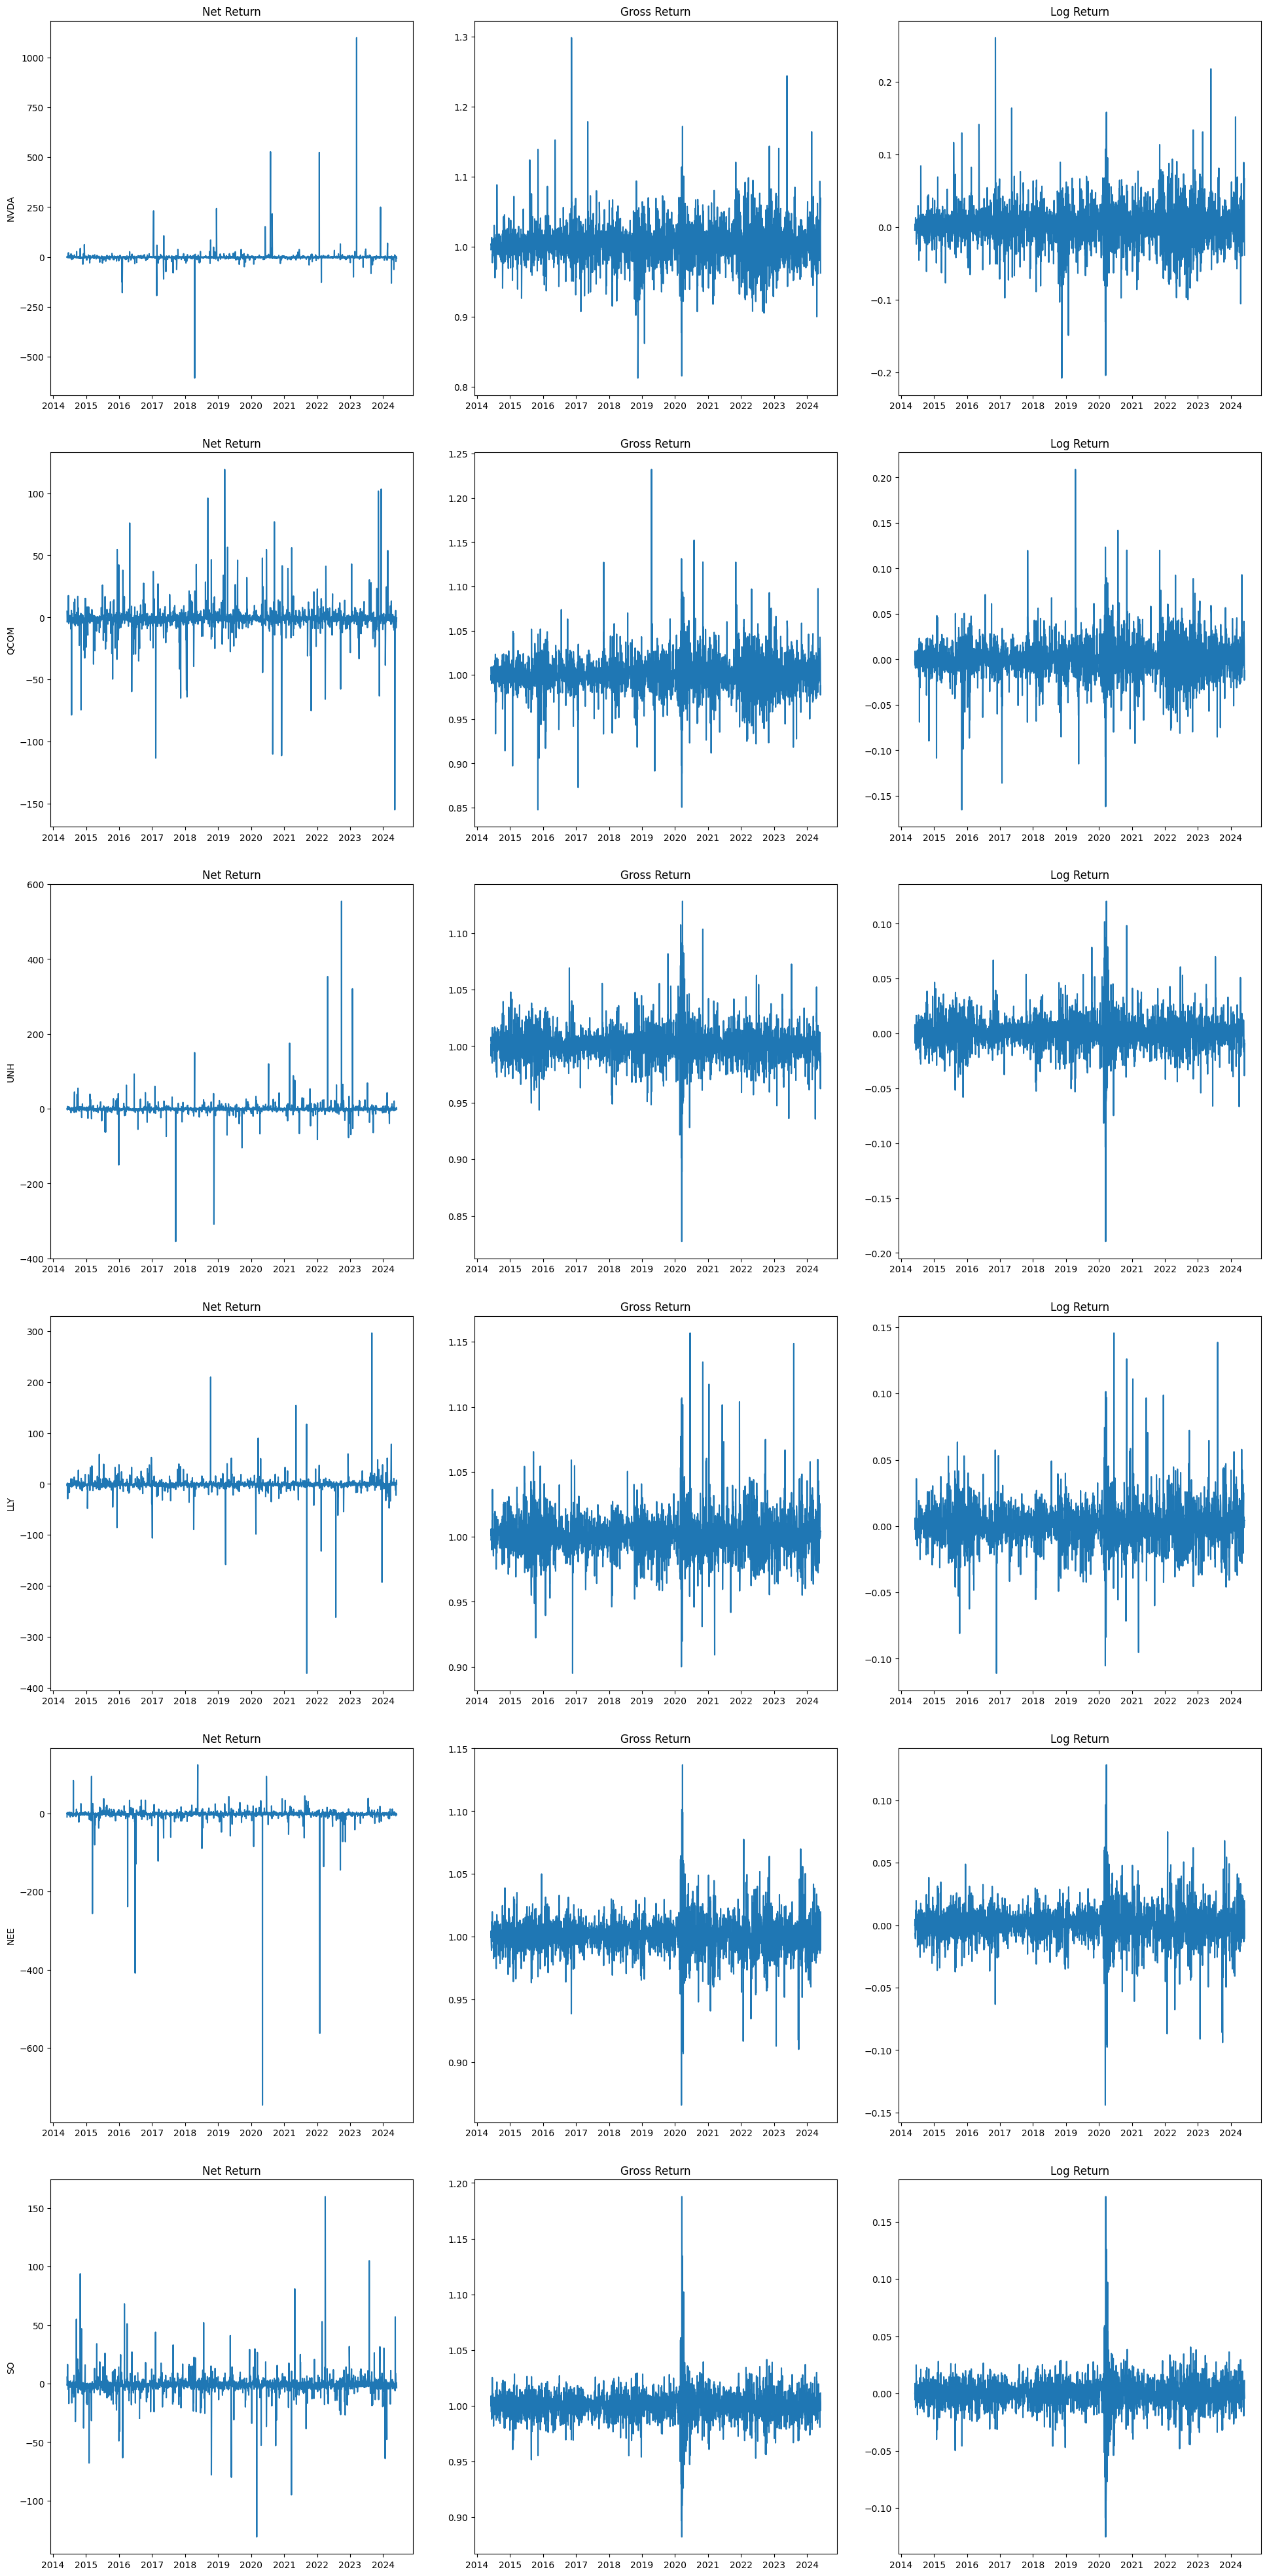

In [25]:
fig, axs = plt.subplots(6, 3, figsize=(20, 40))

stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]
stocks_tickets = ['NVDA', 'QCOM', 'UNH', 'LLY', 'NEE', 'SO']

print(LLY.head())

for i in range (6):
    axs[i, 0].plot(stocks[i]['Net Return'].pct_change())
    axs[i, 0].set_title('Net Return')
    axs[i, 0].set_ylabel(stocks_tickets[i])

    axs[i, 1].plot(stocks[i]['Gross Return'])
    axs[i, 1].set_title('Gross Return')

    axs[i, 2].plot(stocks[i]['Log Return'])
    axs[i, 2].set_title('Log Return')

plt.tight_layout(pad=3.0)
plt.show()

In [29]:
for stock in stocks:
    stock['Cum'] = np.cumprod(stock['Gross Return'])

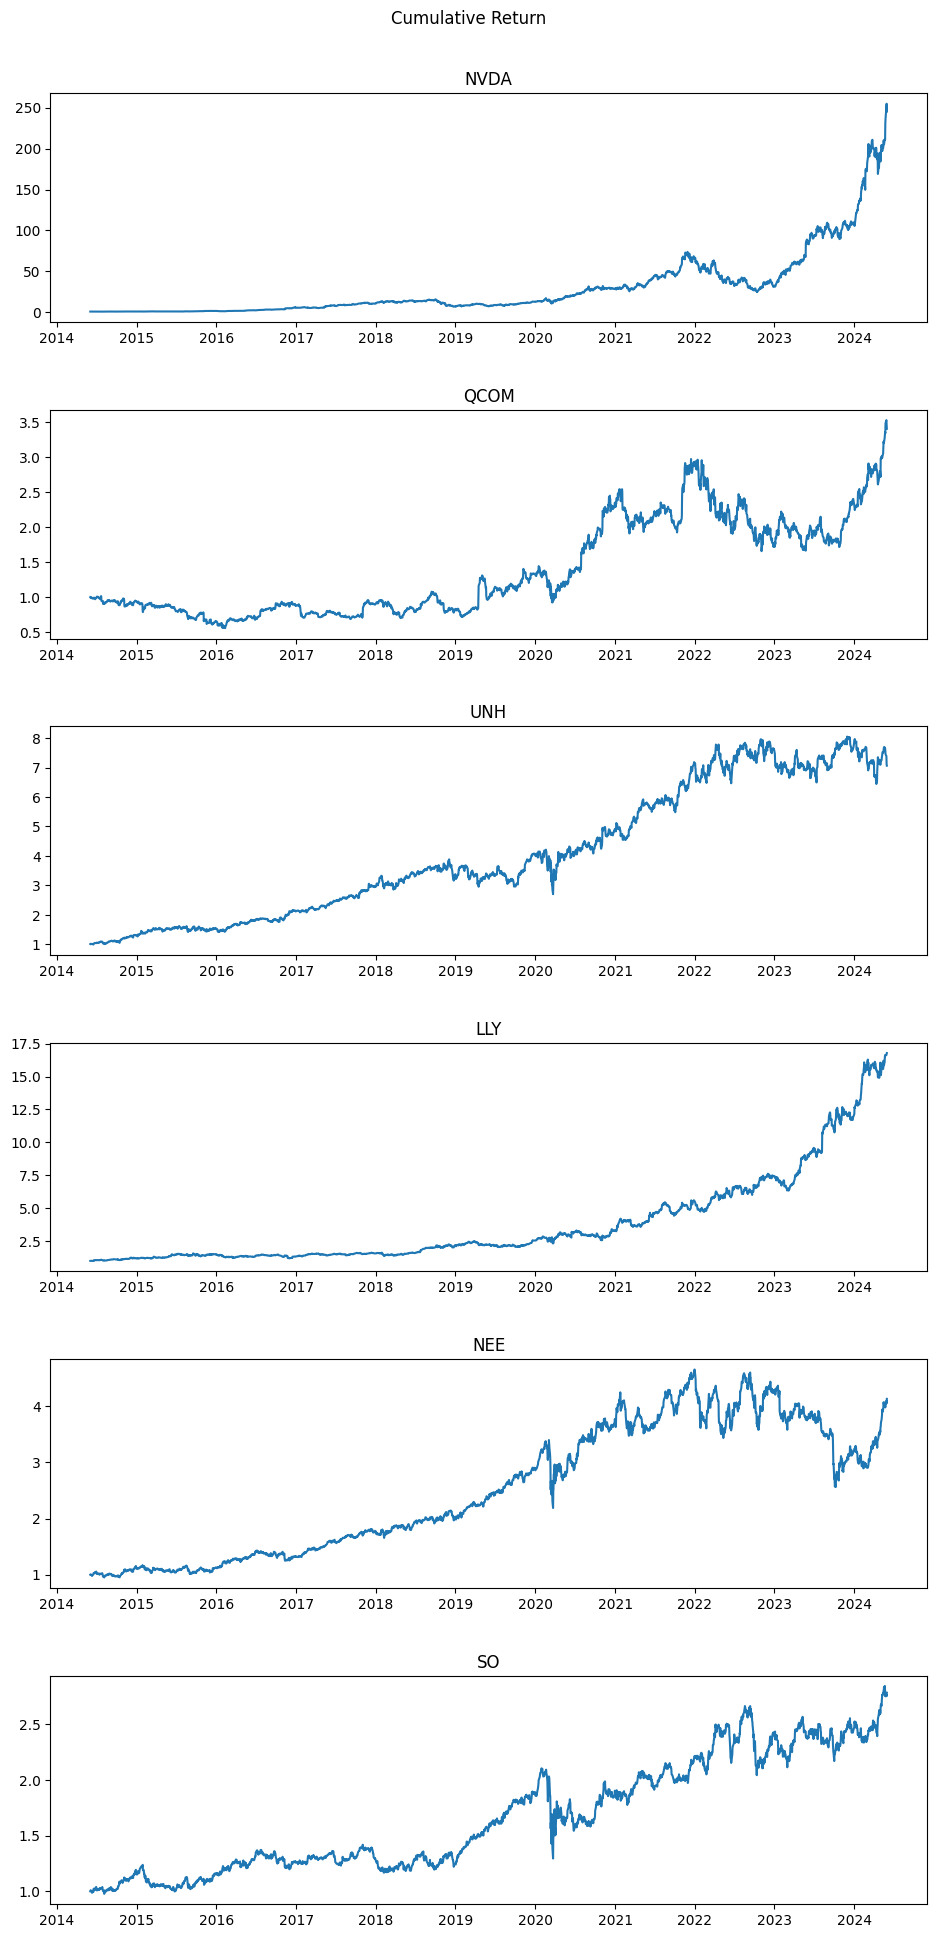

: 

In [30]:
fig, axs = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Cumulative Return')

for i in range(6):
    axs[i].plot(stocks[i]['Cum'])
    axs[i].set_title(stocks_tickets[i])

plt.tight_layout(pad=3.0)
plt.show()